# THUẬT TOÁN RIDGE REGRESSION
# 1. Giới thiệu
Chúng ta sẽ thực hiện dự đoán kết quả thi cuối kỳ dựa trên các điểm thành phần như cw1, mid-term, và cw2. Mô hình sử dụng Ridge Regression (hồi quy Ridge) nhằm giảm thiểu overfitting thông qua tham số regularization λ. Ridge Regression là một dạng hồi quy tuyến tính với một điều khoản thêm vào nhằm phạt các trọng số lớn, làm cho mô hình trở nên ổn định hơn.


# 2. Import các thư viện cần thiết

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

*   NumPy: Thư viện quan trọng cho các phép toán số học trên mảng.

*   matplotlib.pyplot: Sử dụng để vẽ biểu đồ, ví dụ như biểu đồ lỗi theo các giá trị λ.

*   pandas: Được sử dụng để đọc và xử lý dữ liệu từ các file CSV, dữ liệu đầu vào dưới dạng DataFrame.



#3. Mô tả chi tiết các hàm

***Trong ridge_plots.py***

**Hàm plot_errors**

In [19]:
def plot_errors(lamda_values, errors):
    plt.plot(lamda_values, errors)
    plt.xlabel('Giá trị λ')
    plt.ylabel('Lỗi trung bình')
    plt.title('Lỗi theo các giá trị λ')
    plt.show()



*   Vẽ biểu đồ lỗi trung bình theo các giá trị λ, cho phép người dùng thấy rõ mối quan hệ giữa λ và lỗi.



#*Trong ridge_utils.py*

**Hàm load_fold_data**

In [29]:
def load_fold_data(fold_number):
    """Đọc dữ liệu của một fold từ file CSV."""
    train_data = pd.read_csv(f'data/split/K-folds/fold_{fold_number}_train.csv')
    val_data = pd.read_csv(f'data/split/K-folds/fold_{fold_number}_val.csv')

    # Tách biến đầu vào (cw1, mid-term, cw2) và biến đầu ra (final)
    X_train = train_data[['cw1', 'mid-term', 'cw2']].values
    y_train = train_data['final'].values

    X_val = val_data[['cw1', 'mid-term', 'cw2']].values
    y_val = val_data['final'].values

    return X_train, y_train, X_val, y_val



*   Đọc dữ liệu cho một fold cụ thể từ file CSV.




**Hàm load_data_from**

In [21]:
def load_data_from(path):
    input = pd.read_csv(f'{path}')
    data = input[['cw1', 'mid-term', 'cw2']].values
    label = input[['final']].values
    return data, label



*  Tải dữ liệu từ file CSV và tách thành đầu vào và đầu ra.




# *trong ridge_model.py*

**Hàm ridge_regression**

In [22]:
def ridge_regression(X, y, lamda):
    ones = np.ones((X.shape[0], 1))
    Xbar = np.concatenate((ones, X), axis=1)

    A = np.dot(Xbar.T, Xbar) + lamda * np.identity(Xbar.shape[1])
    b = np.dot(Xbar.T, y)
    w = np.dot(np.linalg.pinv(A), b)

    return w



*  Đọc dữ liệu cho một fold cụ thể từ file CSV.


**Hàm train_on_folds**

In [23]:
def train_on_folds(fold_count, lamda_values):
    best_lamda = None
    lowest_error = float('inf')
    avg_errors = []

    for lamda in lamda_values:
        fold_errors = []
        for i in range(fold_count):
            X_train, y_train, X_val, y_val = load_fold_data(i)
            w = ridge_regression(X_train, y_train, lamda)
            y_pred = np.dot(np.concatenate((np.ones((X_val.shape[0], 1)), X_val), axis=1), w)
            error = np.mean((y_val - y_pred) ** 2)
            fold_errors.append(error)

        avg_error = np.mean(fold_errors)
        avg_errors.append(avg_error)

        if avg_error < lowest_error:
            lowest_error = avg_error
            best_lamda = lamda

    return best_lamda, avg_errors





*  Hàm này thực hiện cross-validation để tìm λ tối ưu. Nó đọc dữ liệu cho từng fold, huấn luyện mô hình và tính lỗi trung bình.



**Hàm predict**

In [24]:
def predict(X, w):
    """
    Dự đoán đầu ra từ X với trọng số w.
    """
    ones = np.ones((X.shape[0], 1))
    Xbar = np.concatenate((ones, X), axis=1)
    return np.dot(Xbar, w)



*  Dự đoán đầu ra từ đầu vào X với trọng số w.




#4. Thiết lập các giá trị λ cần kiểm tra


In [25]:
lamda_values = np.logspace(-2, 1, num=100)


**Giải thích:**


*  lamda_values là danh sách các giá trị λ từ
10^-2 đến 10^1 (0.01 đến 10), được tạo trên thang logarit. Điều này giúp chúng ta kiểm tra ảnh hưởng của các giá trị lambda khác nhau lên mô hình.

#5. Huấn luyện mô hình và tìm giá trị λ tối ưu


In [30]:
best_lamda, avg_errors = train_on_folds(fold_count=5, lamda_values=lamda_values)
print(f'Giá trị λ tối ưu: {best_lamda}')

Giá trị λ tối ưu: 8.111308307896872


**Giải thích:**

*   train_on_folds: Chúng ta chia dữ liệu thành 5 fold để thực hiện cross-validation. Mỗi lần huấn luyện, mô hình được huấn luyện trên 4 fold và kiểm tra trên 1 fold còn lại.
*  best_lamda: Trả về giá trị λ mang lại lỗi thấp nhất (tốt nhất) trên các fold.







#6. Lưu mô hình với λ tốt nhất

In [38]:
X_train, y_train = load_data_from('data/split/train_data.csv')
w = ridge_regression(X_train, y_train, best_lamda)
print('Trọng số w = ', w)
np.save('ridge_model_weights.npy', w)


Trọng số w =  [[-0.07498871]
 [-0.02272326]
 [ 0.08349226]
 [ 0.93073971]]


**Giải thích:**

*  ridge_regression: Hàm chính thực hiện thuật toán Ridge Regression để tính trọng số w dựa trên giá trị λ tốt nhất.
*   np.save: Lưu trọng số đã tính toán được vào file .npy để sau này có thể tải lại và sử dụng khi dự đoán





#7. Dự đoán trên tập test


In [41]:
X_test, y_test = load_data_from('data/split/test_data.csv')
weights = np.load('ridge_model_weights.npy')  # Tải trọng số từ file
y_pred = predict(X_test, weights)


**Giải thích:**

*  Chúng ta tải dữ liệu test và trọng số đã huấn luyện để dự đoán kết quả.
*  predict: Hàm dự đoán đầu ra dựa trên dữ liệu test và trọng số w đã huấn luyện.






#8. Tính lỗi và vẽ biểu đồ lỗi theo các giá trị λ

Lỗi trung bình trên tập test: 0.3647525925528757


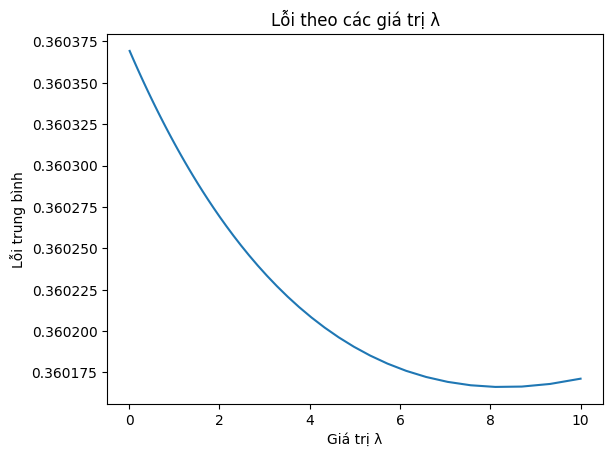

In [40]:
mse_test = np.mean((y_test - y_pred) ** 2)
print(f'Lỗi trung bình trên tập test: {mse_test}')
plot_errors(lamda_values, avg_errors)

**Giải thích:**

*   mse_test: Tính lỗi bình phương trung bình (Mean Squared Error - MSE) trên tập test, giúp đánh giá mức độ chính xác của mô hình.
*   plot_errors: Vẽ biểu đồ lỗi theo từng giá trị λ, cho phép trực quan hóa kết quả để kiểm tra xem mô hình có hoạt động tốt hay không.




